# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [169]:
"""
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()
"""

## Parte 1

### _Setup_ da parte 1

In [5]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [7]:
# Sua análise da parte 1 começa aqui.
dataframe.head(10)

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21
5,19.063452,14
6,26.316851,18
7,23.069739,23
8,18.122102,18
9,22.170240,23


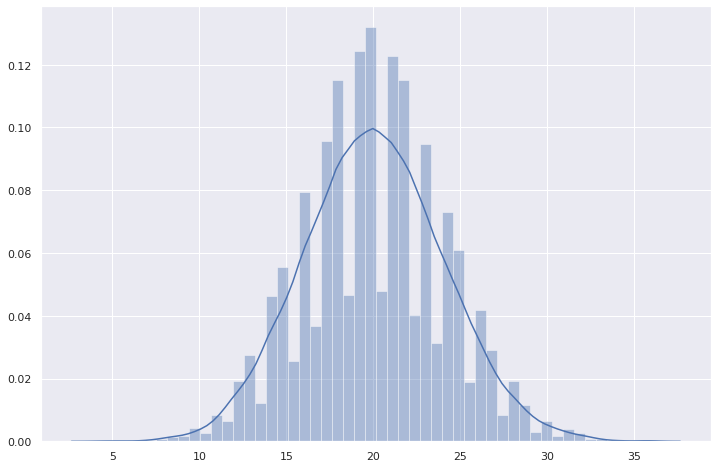

In [164]:
sns.distplot(dataframe)
plt.show()

In [13]:
dataframe.shape

(10000, 2)

In [14]:
dataframe.describe()

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


In [17]:
(dataframe.mean(), dataframe.var(), dataframe.std())

(normal      19.991456
 binomial    20.097000
 dtype: float64,
 normal      16.110988
 binomial    16.331224
 dtype: float64,
 normal      4.013850
 binomial    4.041191
 dtype: float64)

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [66]:
def q1():
    # Retorne aqui o resultado da questão 1.
    #quantile: Return values at the given quantile over requested axis
    q1_norm = dataframe['normal'].quantile(0.25)
    q2_norm = dataframe['normal'].quantile(0.5)
    q3_norm = dataframe['normal'].quantile(0.75)
    print('Distribuição Normal: ', q1_norm, q2_norm, q3_norm)
    
    q1_binom = dataframe['binomial'].quantile(0.25)
    q2_binom = dataframe['binomial'].quantile(0.5)
    q3_binom = dataframe['binomial'].quantile(0.75)
    print('Distribuição Binomial: ', q1_binom, q2_binom, q3_binom)
    
    diff_q1 = q1_norm - q1_binom
    diff_q1 = round(diff_q1, 3)
    
    diff_q2 = q2_norm - q2_binom
    diff_q2 = round(diff_q2, 3)
    
    diff_q3 = q3_norm - q3_binom
    diff_q3 = round(diff_q3, 3)
    
    diff = diff_q1, diff_q2, diff_q3
    
    return tuple(diff)
    
ans = q1()
print(ans)

Distribuição Normal:  17.30963787997159 19.98962009682849 22.68432355145866
Distribuição Binomial:  17.0 20.0 23.0
(0.31, -0.01, -0.316)


Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [176]:
def q2():
    # Retorne aqui o resultado da questão 2.
    ecdf = ECDF(dataframe.loc[:,'normal'])
    mean = dataframe.loc[:,'normal'].mean()
    std = dataframe.loc[:,'normal'].std()
    
    p = []
    for val in [ecdf(mean - std), ecdf(mean + std)]:
        p.append(round(val, 3))
        
    ans = p[1] - p[0]
        
    return float(round(ans, 3))
    
ans = q2()
print(ans)

0.684


Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [103]:
def q3():
    # Retorne aqui o resultado da questão 3.
    m_binom = dataframe['binomial'].mean()
    v_binom = dataframe['binomial'].var()
    
    m_norm = dataframe['normal'].mean()
    #m_norm = round(m_norm, 3)
    v_norm = dataframe['normal'].var()
    
    diff = [m_binom - m_norm, v_binom - v_norm]
    ans = []
    for val in diff:
        ans.append(round(val,3))
    
    return tuple(ans)

ans = q3()
print(ans)

(0.106, 0.22)


Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [106]:
stars = pd.read_csv("stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [107]:
# Sua análise da parte 2 começa aqui.
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


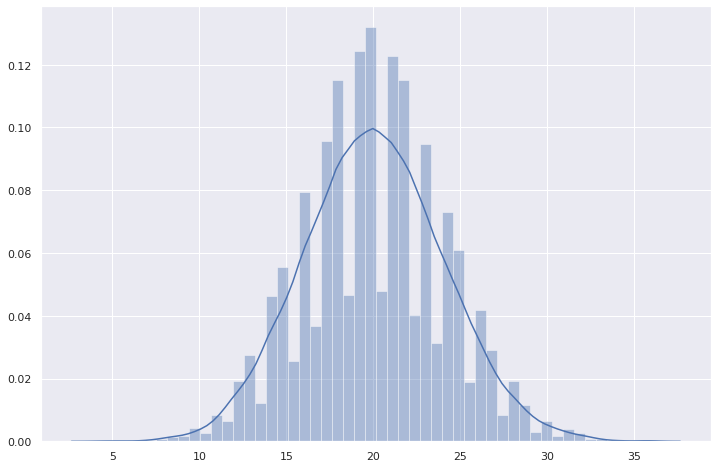

In [163]:
sns.distplot(dataframe)
plt.show()

In [111]:
stars.describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


In [112]:
stars.shape

(17897, 9)

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [128]:
def q4():
    # Retorne aqui o resultado da questão 4.
    #Filtre apenas os valores de mean_profile onde target == 0 (ou seja, onde a estrela não é um pulsar).
    filtering = stars.loc[stars['target'] == 0]['mean_profile']
    #Padronize a variável mean_profile filtrada anteriormente para ter média 0 e variância 1.
    false_pulsar_mean_profile_standardized = (filtering - filtering.mean())/filtering.std()
    
    quantiles = sct.norm.ppf([0.8, 0.9, 0.95])
    ecdf = ECDF(false_pulsar_mean_profile_standardized)
    
    probs = ecdf(quantiles)
    p = []
    for val in probs:
        p.append(round(val, 3))
    
    return tuple(p)

ans = q4()
print(ans)

(0.806, 0.911, 0.959)


Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [157]:
def q5():
    # Retorne aqui o resultado da questão 5.
    mean = 0
    std = 1
    
    filtering = stars.loc[stars['target'] == 0]['mean_profile']
    false_pulsar_mean_profile_standardized = (filtering - filtering.mean())/filtering.std()
    
    standardized_quantiles = np.quantile(false_pulsar_mean_profile_standardized, [0.25, 0.50, 0.75])
    #print(standardized_quantiles)
    normalized_quantiles = sct.norm.ppf([0.25, 0.50, 0.75], loc=mean, scale=std)
    #print(normalized_quantiles)
        
    diff = [standardized_quantiles[0]-normalized_quantiles[0], standardized_quantiles[1]-normalized_quantiles[1],
           standardized_quantiles[2]-normalized_quantiles[2]]
    d = []
    for val in diff:
        d.append(round(val, 3))
    
    return tuple(d)

ans = q5()
print(ans)

(0.027, 0.04, -0.004)


Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.